#1. Implement logistic regression from scratch on a categorical dataset of your choice.

i) Choose categorical target variable

ii) Apply gradient descent and Maximum Likelihood Estimation for optimizing the target function

iii) Calculate Predicted accuracy

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data=load_breast_cancer()
X=data.data
y=data.target.reshape(-1,1)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=np.c_[np.ones(X_scaled.shape[0]),X_scaled]
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

def sigmoid(z):
  return 1/(1+np.exp(-z))

def compute_cost(X,y,w):
  m=len(y)
  h=sigmoid(X.dot(w))
  eps=1e-15
  cost=(-1/m)*(y.T.dot(np.log(h+eps)))+(1-y).T.dot(np.log(1-h+eps))
  return cost.item()


def predict(X,w):
  probs=sigmoid(X.dot(w))
  return (probs>0.5).astype(int)
def gradient_descent(X,y,lr=0.1,iter=1000):
  m,n=X.shape
  w=np.ones((n,1))
  for i in range(iter+1):
    h=sigmoid(X.dot(w))
    grad=(1/m)*(X.T.dot(h-y))
    w-=lr*grad
    if(i%100==0):
      loss = compute_cost(X, y, w)
      preds = predict(X, w)
      acc   = accuracy_score(y, preds)
      print(f"Iteration {i:4d}: Loss = {loss:.4f}, Accuracy = {acc*100:.2f}%")
  return w
w=gradient_descent(X_train,y_train)
y_pred=predict(X_test,w)
print("Final Accuracy")
print(accuracy_score(y_pred,y_test))

Iteration    0: Loss = -2460.0993, Accuracy = 13.32%
Iteration  100: Loss = -34.4114, Accuracy = 95.48%
Iteration  200: Loss = -25.3959, Accuracy = 96.98%
Iteration  300: Loss = -21.8454, Accuracy = 97.74%
Iteration  400: Loss = -20.0142, Accuracy = 97.99%
Iteration  500: Loss = -18.8900, Accuracy = 97.99%
Iteration  600: Loss = -18.1175, Accuracy = 98.24%
Iteration  700: Loss = -17.5441, Accuracy = 98.24%
Iteration  800: Loss = -17.0946, Accuracy = 98.24%
Iteration  900: Loss = -16.7279, Accuracy = 98.24%
Iteration 1000: Loss = -16.4194, Accuracy = 98.24%
Final Accuracy
0.9941520467836257


# 2. Implement a Naive Bayes classifier for text classification

(Dataset link: http://www.cs.cmu.edu/afs/cs/project/theo-11/www/naive-bayes.html  
Machine Learning- Tom M. Mitchell. )


 Accuracy Score: 0.857597623089983
                          precision    recall  f1-score   support

             alt.atheism       0.90      0.87      0.88       198
           comp.graphics       0.78      0.82      0.80       245
 comp.os.ms-windows.misc       0.93      0.72      0.81       242
comp.sys.ibm.pc.hardware       0.71      0.82      0.76       238
   comp.sys.mac.hardware       0.94      0.82      0.88       250
          comp.windows.x       0.92      0.85      0.88       260
            misc.forsale       0.95      0.61      0.74       241
               rec.autos       0.92      0.83      0.88       244
         rec.motorcycles       0.99      0.88      0.93       219
      rec.sport.baseball       0.99      0.91      0.95       261
        rec.sport.hockey       0.94      0.95      0.95       245
               sci.crypt       0.82      0.96      0.88       251
         sci.electronics       0.93      0.75      0.83       249
                 sci.med       0.95    

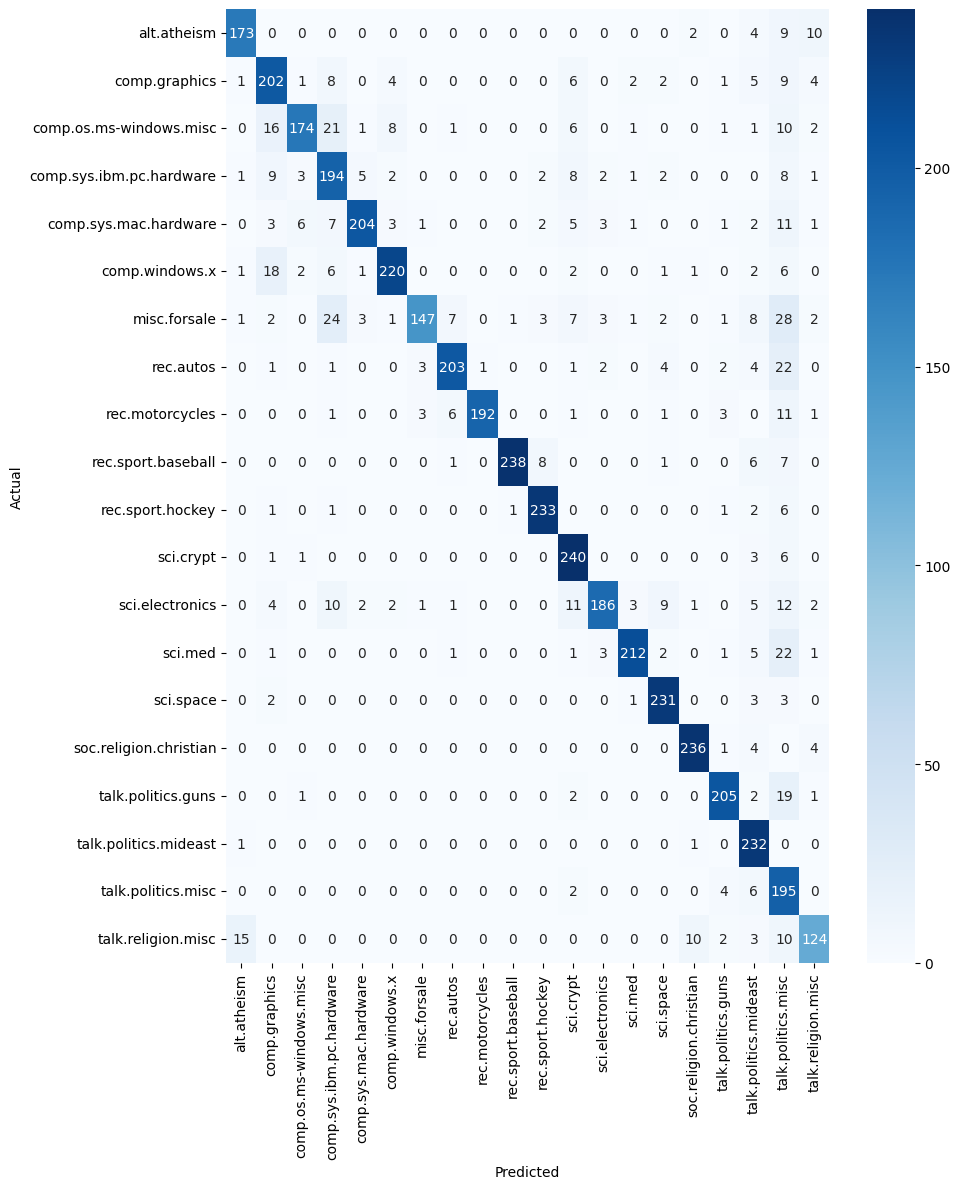

Sample Text

From: shippert@cco.caltech.edu (Tim Shippert) Subject: Re: Infield Fly Rule Organization: California Institute of Technology, Pasadena Lines: 25 NNTP-Posting-Host: sandman.caltech.edu  jrogoff@scott.skidmore.edu (jay rogoff) writes:  >One last infield fly question that has always puzzled me and hasn't >yet been addressed.  I believe the rule also does *not* deal with this >situation:  >However, if the Infield Fly is *not* caught, at what point can a runner >legally leave his base w/o fear of bei ...

Actual label: rec.sport.baseball

Predicted label: rec.sport.baseball



In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=fetch_20newsgroups(subset='all',shuffle=True, random_state=42)
labels=data.target_names
X_train, X_test,y_train, y_test=train_test_split(data.data,data.target, test_size=0.25,random_state=42)
vectorizer=CountVectorizer(stop_words='english',binary=True)
X_train_vec=vectorizer.fit_transform(X_train)
X_test_vec=vectorizer.transform(X_test)
def train_naive_bayes(X,y):
  n_samples,n_features=X.shape
  classes=np.unique(y)
  log_class_priors=np.log(np.bincount(y)/n_samples)
  log_likelihood=np.zeros((len(classes),n_features))
  for c in classes:
    X_c=X[y==c]
    feature_counts=X_c.sum(axis=0);
    log_likelihood[c,:]=np.log((feature_counts+1)/(X_c.shape[0]+2))
  return log_class_priors , log_likelihood


def predict_naive_bayes(X,log_class_priors,log_likelihood):
  return np.argmax (X @ log_likelihood.T+log_class_priors,axis=1)

log_priors,log_likelihoods=train_naive_bayes(X_train_vec,y_train)
y_pred=predict_naive_bayes(X_test_vec,log_priors,log_likelihoods)
acc=accuracy_score(y_test,y_pred)
print(f"\n Accuracy Score: {acc}")
print(classification_report(y_test,y_pred,target_names=labels))
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,12))
sns.heatmap(cm,cmap="Blues",fmt='d',annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(len(labels))+0.5,labels,rotation=90)
plt.yticks(np.arange(len(labels))+0.5,labels,rotation=0)
plt.tight_layout()
plt.show()

i=0
sample_text=X_test[i]
true_label=labels[y_test[i]]
pred_label=labels[predict_naive_bayes(vectorizer.transform([sample_text]),log_priors,log_likelihoods)[0]]
print("Sample Text\n")
print(sample_text[:500].replace("\n"," "),"...\n")
print(f"Actual label: {true_label}\n")
print(f"Predicted label: {pred_label}\n")





#3. Implement k-nearest neighbour algorithm on the admission dataset and Diabetes dataset.

a. Compute the confusion matrix and misclassification error considering k = 5 and k = 10.

b. Plot the performance of the model on the test data.


=== DIABETES DATASET ===

k = 5
Accuracy: 0.7143
Misclassification Error: 0.2857

k = 10
Accuracy: 0.7597
Misclassification Error: 0.2403


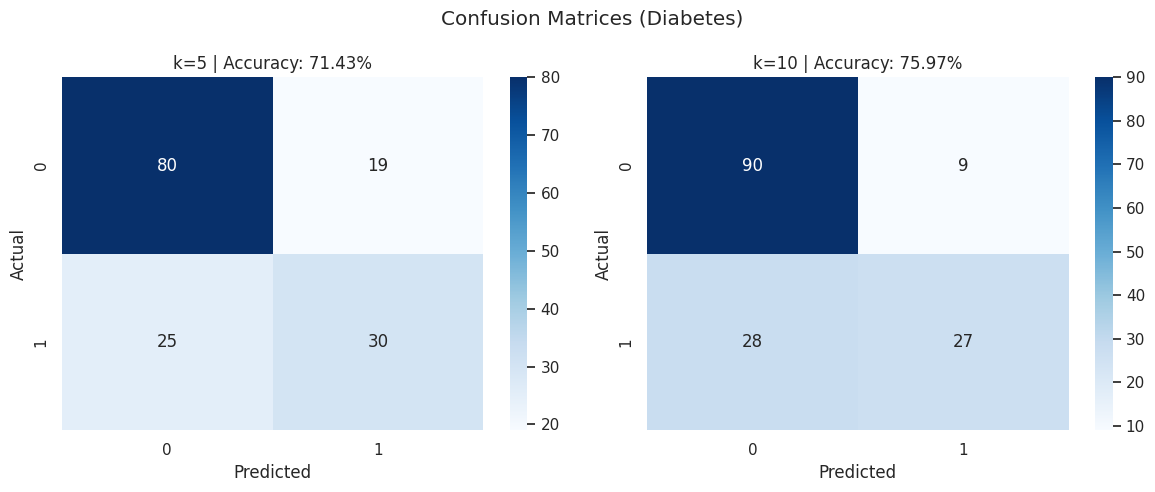


=== ADMISSION DATASET ===

k = 5
Accuracy: 0.6125
Misclassification Error: 0.3875

k = 10
Accuracy: 0.6625
Misclassification Error: 0.3375


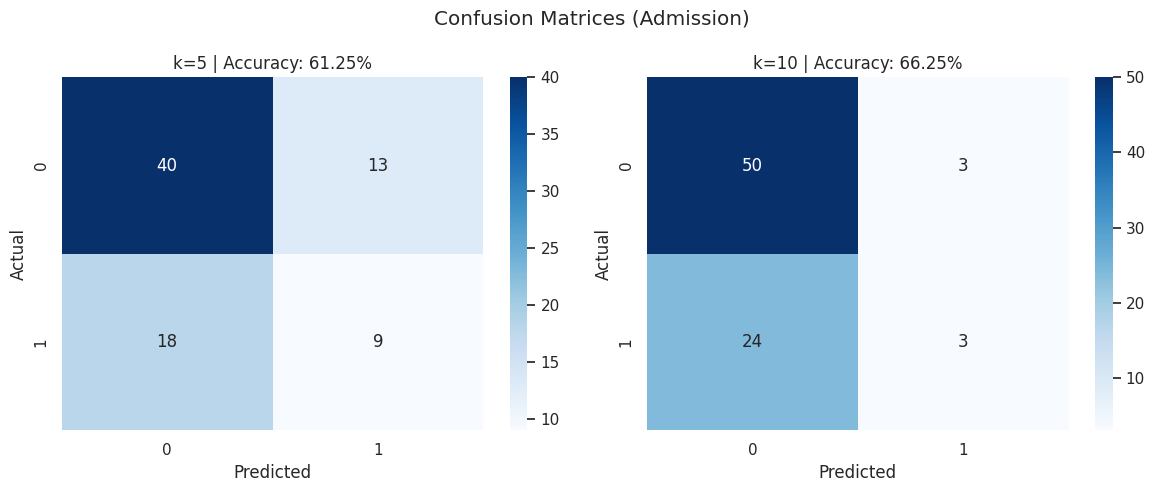

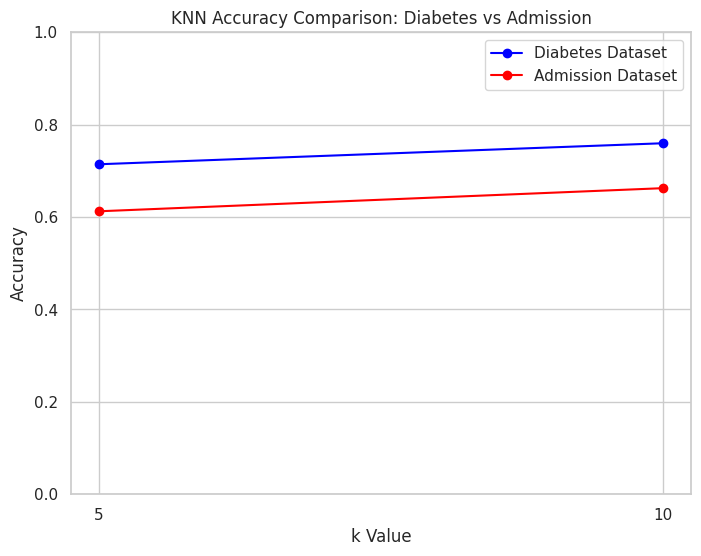

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
def process_knn(dataset_name, df, target_column):
  print(f"\n=== {dataset_name.upper()} DATASET ===")
  X = df.drop(target_column, axis=1)
  y = df[target_column]
  scaler = StandardScaler()

  X_scaled=scaler.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
  # scaler = StandardScaler()
  # X_train_scaled = scaler.fit_transform(X_train)
  # X_test_scaled = scaler.transform(X_test)
  k_values = [5, 10]
  accuracies = []
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  fig.suptitle(f'Confusion Matrices ({dataset_name})')
  for idx, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    mis_err = 1 - acc
    accuracies.append(acc)

    print(f"\nk = {k}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Misclassification Error: {mis_err:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'k={k} | Accuracy: {acc*100:.2f}%')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')
  plt.tight_layout()
  plt.show()
  return accuracies


df_diabetes = pd.read_csv('diabetes.csv')
df_admission = pd.read_csv('admission_data.csv')
acc_diabetes = process_knn("Diabetes", df_diabetes, 'class')
acc_admission = process_knn("Admission", df_admission, 'admit')
k_vals = [5, 10]
plt.figure(figsize=(8, 6))
plt.plot(k_vals, acc_diabetes, marker='o', label='Diabetes Dataset', color='blue')
plt.plot(k_vals, acc_admission, marker='o', label='Admission Dataset', color='red')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy Comparison: Diabetes vs Admission')
plt.xticks(k_vals)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()